In [114]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('music_data/train.csv')
df.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


# Checking for Null values

In [115]:
result = df.shape
print(result) # 8000 records 7 colums 

df.isnull().sum() # data null of null values

(8000, 7)


SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
Popularity        0
dtype: int64

# Check for Outliers 

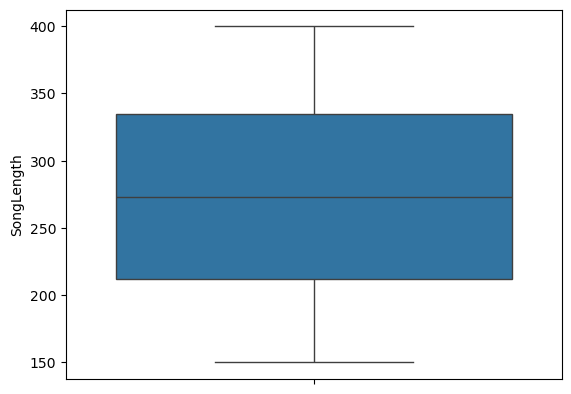

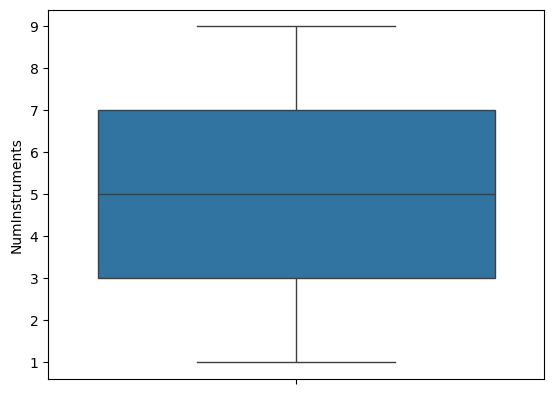

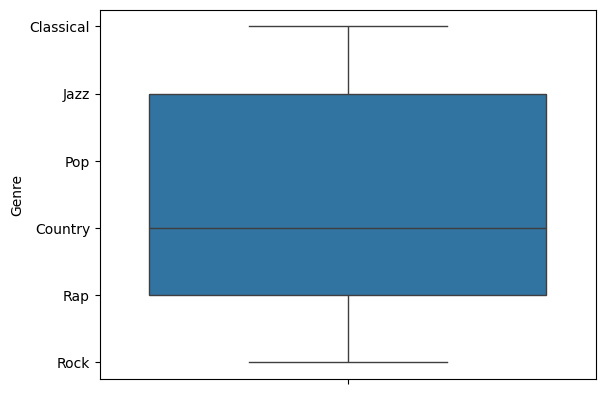

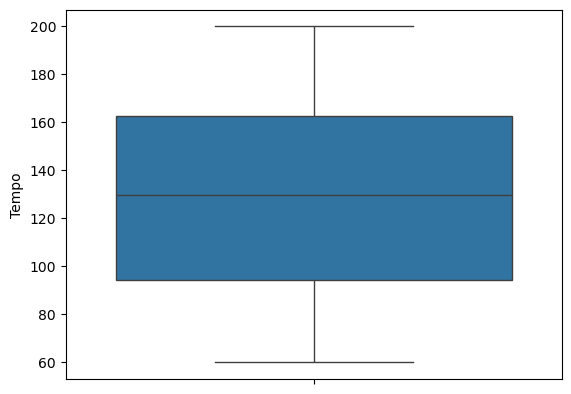

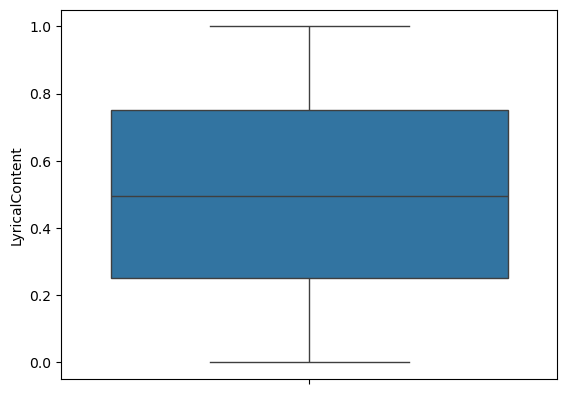

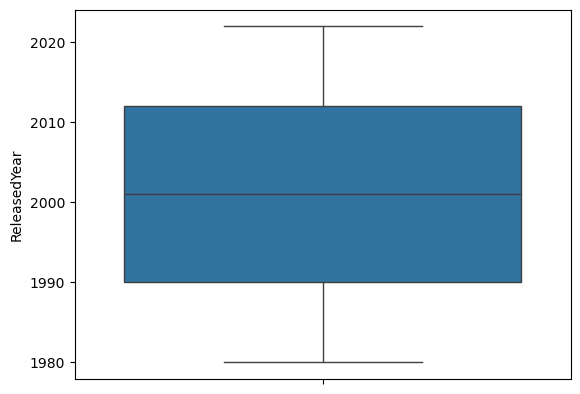

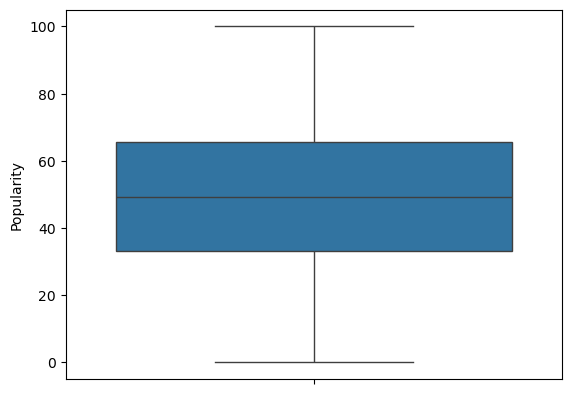

In [116]:
sns.boxplot(data=df['SongLength'])
plt.show()

sns.boxplot(data=df['NumInstruments'])
plt.show()

sns.boxplot(data=df['Genre'])
plt.show()

sns.boxplot(data=df['Tempo'])
plt.show()

sns.boxplot(data=df['LyricalContent'])
plt.show()

sns.boxplot(data=df['ReleasedYear'])
plt.show()

sns.boxplot(data=df['Popularity'])
plt.show()

# One-Hot Encoding Categorical Data 

In [117]:
# Get unique genres
unique_genres = df['Genre'].unique() 

# Print the unique genres
print(unique_genres)

# hot encode categorical data 
df = pd.get_dummies(df, columns=['Genre'])

# Check the DataFrame columns after one-hot encoding
print("DataFrame columns after one-hot encoding:")
print(df.columns.tolist())

['Classical' 'Jazz' 'Pop' 'Country' 'Rap' 'Rock']
DataFrame columns after one-hot encoding:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity', 'Genre_Classical', 'Genre_Country', 'Genre_Jazz', 'Genre_Pop', 'Genre_Rap', 'Genre_Rock']


In [118]:
# Check the DataFrame columns after one-hot encoding
print("DataFrame columns after one-hot encoding:")
print(df.columns.tolist())

DataFrame columns after one-hot encoding:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity', 'Genre_Classical', 'Genre_Country', 'Genre_Jazz', 'Genre_Pop', 'Genre_Rap', 'Genre_Rock']


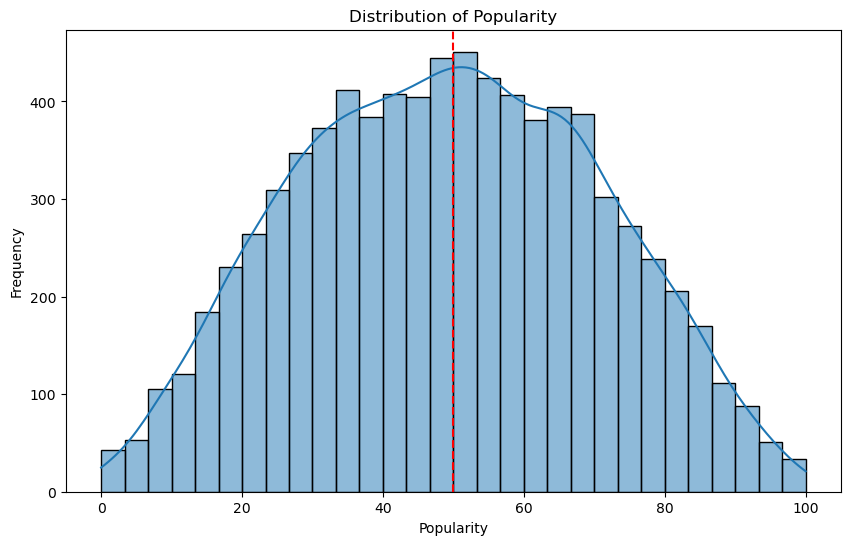

In [119]:
threshold = 50



# Plot the histogram of the Popularity column
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)  # KDE adds a density plot
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='r', linestyle='--')  # Optional: add a line for your threshold
plt.show()

In [120]:


#identify features and target
X_cols = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear',
          'Genre_Classical', 'Genre_Jazz', 'Genre_Pop', 'Genre_Country', 'Genre_Rap', 'Genre_Rock']

X = df[X_cols]
y = df['Popularity']

print(y.head())
print(y.dtype)


0    13.636534
1    42.910689
2    48.790880
3    68.362001
4    86.969489
Name: Popularity, dtype: float64
float64


In [121]:
# Define a threshold based on your analysis or visualization
threshold = 50  # Example threshold, adjust based on your dataset
df['Popularity'] = (df['Popularity'] > threshold).astype(int)  # Convert to binary

# Now redefine y after binarization
y = df['Popularity']


# Linear Regression Model

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#instantiate model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")



Linear Regression Mean Squared Error: 0.08030362671815033


# Logistic Regression

Logistical Regression Accuracy: 0.930625
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       795
           1       0.93      0.93      0.93       805

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



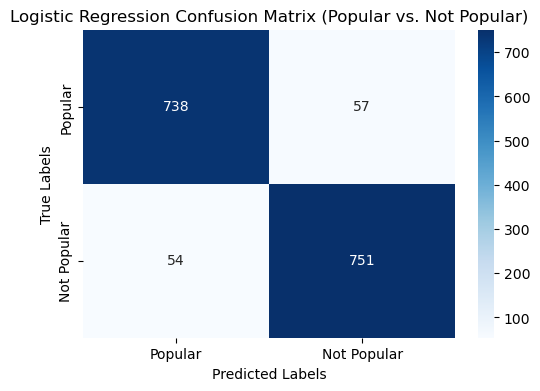

In [123]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistical Regression Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix_log = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Popular", "Not Popular"], yticklabels=["Popular", "Not Popular"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix (Popular vs. Not Popular)")
plt.show()


# Decision Tree Regression

In [124]:

tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

Decision Tree Regression Mean Squared Error: 0.100625


# Random Forest Regression

In [125]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


forest = RandomForestRegressor(random_state=0, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regression Mean Squared Error: {mse_forest}")

Random Forest Regression Mean Squared Error: 0.0526838125
